# Train my __recurrent neural network__ model

## Import data & data_utils

In [1]:
# Clone into Climsim GitHub repo
!git clone https://github.com/leap-stc/ClimSim.git

Cloning into 'ClimSim'...
remote: Enumerating objects: 4506, done.
remote: Counting objects: 100% (811/811), done.
remote: Compressing objects: 100% (357/357), done.
remote: Total 4506 (delta 461), reused 718 (delta 441), pack-reused 3695
Receiving objects: 100% (4506/4506), 140.16 MiB | 25.11 MiB/s, done.
Resolving deltas: 100% (1554/1554), done.
Updating files: 100% (2068/2068), done.


In [2]:
# Import ClimSim data_utils (libraries)
%cd ClimSim
!pip install .
from climsim_utils.data_utils import *

/content/ClimSim
Processing /content/ClimSim
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.2 MB/s eta 0:00:00
  Created wheel for climsim-utils: filename=climsim_utils-0.0.1-py3-none-any.whl size=14489 sha256=2536f5f3120e5ec1ed866b113da9e25dd2f06c9e093677e4528611ec1d4d51d7
  Stored in directory: /tmp/pip-ephem-wheel-cache-ugzejz5r/wheels/a2/10/6e/125ae0c7cf1c521a7afaa0ba206e930d032a286728ae1a9103
Successfully built climsim-utils


In [3]:
# Load RNN train & test data
# Clone into my GitHub repo; change this path to your own
%cd ..
!git clone https://github.com/pw2555/climsim_rnn_testfile

/content
Cloning into 'climsim_rnn_testfile'...
remote: Enumerating objects: 308, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 308 (delta 1), reused 0 (delta 0), pack-reused 306
Receiving objects: 100% (308/308), 300.59 MiB | 25.52 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Updating files: 100% (293/293), done.


## Load training and validation data

In [4]:
# Change this path to your own
day1_input_path = '/content/climsim_rnn_testfile/day1_input/'
filenames = [day1_input_path + f'E3SM-MMF.mli.0001-02-01-{i:05d}.nc' for i in range(0, 86400, 1200)]
datasets = [xr.open_dataset(fname) for fname in filenames]
day1_input = xr.concat(datasets, dim='time')

day1_output_path = '/content/climsim_rnn_testfile/day1_output/'
filenames = [day1_output_path + f'E3SM-MMF.mlo.0001-02-01-{i:05d}.nc' for i in range(0, 86400, 1200)]
datasets = [xr.open_dataset(fname) for fname in filenames]
day1_output = xr.concat(datasets, dim='time')

day2_input_path = '/content/climsim_rnn_testfile/day2_input/'
filenames = [day2_input_path + f'E3SM-MMF.mli.0001-02-02-{i:05d}.nc' for i in range(0, 86400, 1200)]
datasets = [xr.open_dataset(fname) for fname in filenames]
day2_input = xr.concat(datasets, dim='time')

day2_output_path = '/content/climsim_rnn_testfile/day2_output/'
filenames = [day2_output_path + f'E3SM-MMF.mlo.0001-02-02-{i:05d}.nc' for i in range(0, 86400, 1200)]
datasets = [xr.open_dataset(fname) for fname in filenames]
day2_output = xr.concat(datasets, dim='time')

In [5]:
day1_input
# should have dim = (time: 72, ncol: 384, level: 60); var = 29

<xarray.Dataset>
Dimensions:           (time: 72, ncol: 384, lev: 60)
Dimensions without coordinates: time, ncol, lev
Data variables: (12/29)
    ymd               (time) int32 10201 10201 10201 10201 ... 10201 10201 10201
    tod               (time) int32 0 1200 2400 3600 ... 81600 82800 84000 85200
    cam_in_ALDIF      (time, ncol) float64 1.0 1.0 1.0 ... 0.3667 0.1039 0.09126
    cam_in_ALDIR      (time, ncol) float64 1.0 1.0 1.0 ... 0.384 0.1471 0.1398
    cam_in_ASDIF      (time, ncol) float64 1.0 1.0 1.0 ... 0.3294 0.1025 0.06394
    cam_in_ASDIR      (time, ncol) float64 1.0 1.0 1.0 ... 0.2962 0.1464 0.113
    ...                ...
    state_t           (time, lev, ncol) float64 213.8 213.2 ... 264.2 271.1
    state_u           (time, lev, ncol) float64 -76.15 -62.88 ... 8.206 -8.979
    state_v           (time, lev, ncol) float64 0.7073 -1.877 ... -9.074 -1.035
    pbuf_CH4          (time, lev, ncol) float64 1.705e-07 ... 9.986e-07
    pbuf_N2O          (time, lev, ncol) float64 2.709e-08 ... 4.909e-07
    pbuf_ozone        (time, lev, ncol) float64 2.501e-07 ... 7.162e-08
Attributes:
    ne:        4
    fv_nphys:  2
    calendar:  NO_LEAP

In [6]:
day1_output
# should have dim = (time: 72, ncol: 384, level: 60); var = 16

<xarray.Dataset>
Dimensions:         (time: 72, ncol: 384, lev: 60)
Dimensions without coordinates: time, ncol, lev
Data variables: (12/16)
    ymd             (time) int32 10201 10201 10201 10201 ... 10201 10201 10201
    tod             (time) int32 0 1200 2400 3600 ... 81600 82800 84000 85200
    cam_out_FLWDS   (time, ncol) float64 349.6 335.2 401.7 ... 218.1 243.0 294.8
    cam_out_NETSW   (time, ncol) float64 0.0 0.0 0.0 0.0 ... 66.25 276.5 78.43
    cam_out_PRECC   (time, ncol) float64 2.948e-12 3.138e-09 ... 3.363e-09
    cam_out_PRECSC  (time, ncol) float64 0.0 0.0 0.0 ... 0.0 6.022e-09 2.779e-09
    ...              ...
    state_q0001     (time, lev, ncol) float64 1.485e-06 1.487e-06 ... 0.002496
    state_q0002     (time, lev, ncol) float64 2.164e-33 1.759e-33 ... 0.0 0.0
    state_q0003     (time, lev, ncol) float64 1.185e-25 1.219e-25 ... 0.0 0.0
    state_t         (time, lev, ncol) float64 213.8 213.2 217.1 ... 264.0 271.0
    state_u         (time, lev, ncol) float64 -76.15 -62.88 ... 8.253 -9.133
    state_v         (time, lev, ncol) float64 0.7073 -1.877 ... -9.158 -0.9886
Attributes:
    ne:        4
    fv_nphys:  2
    calendar:  NO_LEAP

## Pre-processing: Normalization & Reshaping

In [7]:
# Normalization function
def normalize_data(data, mean=None, std=None):
    if mean is None or std is None:
        mean = data.mean(dim='time', skipna=True)
        std = data.std(dim='time', skipna=True)

    normalized_data = (data - mean) / std

    return normalized_data, mean, std

In [8]:
# Normalization: input variables
# 'state_t' :: air temperature :: 60 :: K
# 'state_q0001' :: specific humidity :: 60 :: kg/kg
# 'state_ps' :: surface pressure :: 1 :: Pa
# 'pbuf_SOLIN' :: solar insolation :: 1 :: W/m^2
# 'pbuf_LHFLX' :: surface latent heat flux :: 1 :: W/m^2
# 'pbuf_SHFLX' :: surface sensible heat flux :: 1 :: W/m^2

day1_input_state_t_normalized, state_t_mean, state_t_std = normalize_data(day1_input['state_t'])
day1_input_state_q0001_normalized, state_q0001_mean, state_q0001_std = normalize_data(day1_input['state_q0001'])
day1_input_state_ps_normalized, state_ps_mean, state_ps_std = normalize_data(day1_input['state_ps'])
day1_input_pbuf_SOLIN_normalized, pbuf_SOLIN_mean, pbuf_SOLIN_std = normalize_data(day1_input['pbuf_SOLIN'])
day1_input_pbuf_LHFLX_normalized, pbuf_LHFLX_mean, pbuf_LHFLX_std = normalize_data(day1_input['pbuf_LHFLX'])
day1_input_pbuf_SHFLX_normalized, pbuf_SHFLX_mean, pbuf_SHFLX_std = normalize_data(day1_input['pbuf_SHFLX'])

day2_input_state_t_normalized, _, _ = normalize_data(day2_input['state_t'], state_t_mean, state_t_std)
day2_input_state_q0001_normalized, _, _ = normalize_data(day2_input['state_q0001'], state_q0001_mean, state_q0001_std)
day2_input_state_ps_normalized, _, _ = normalize_data(day2_input['state_ps'], state_ps_mean, state_ps_std)
day2_input_pbuf_SOLIN_normalized, _, _ = normalize_data(day2_input['pbuf_SOLIN'], pbuf_SOLIN_mean, pbuf_SOLIN_std)
day2_input_pbuf_LHFLX_normalized, _, _ = normalize_data(day2_input['pbuf_LHFLX'], pbuf_LHFLX_mean, pbuf_LHFLX_std)
day2_input_pbuf_SHFLX_normalized, _, _ = normalize_data(day2_input['pbuf_SHFLX'], pbuf_SHFLX_mean, pbuf_SHFLX_std)

In [9]:
# Reshape data: day1_input
# RNN requires (batch_size, timesteps, features)

# 'state_t': 3D
# 'state_q0001: 3D
# 'state_ps': 2D
# 'pbuf_SOLIN': 2D
# 'pbuf_LHFLX': 2D
# 'pbuf_SHFLX': 2D

day1_input_state_t_array = day1_input_state_t_normalized.values
day1_input_state_q0001_array = day1_input_state_q0001_normalized.values

# For 3D variables
day1_input_state_t_reshaped = day1_input_state_t_array.reshape(72, -1)  # Flattens lev and ncol into a single dimension
day1_input_state_q0001_reshaped = day1_input_state_q0001_array.reshape(72, -1)

# For 2D variables
day1_input_state_ps_array = day1_input_state_ps_normalized.values
day1_input_state_ps_reshaped = day1_input_state_ps_array.reshape(72, 384)

day1_input_pbuf_SOLIN_array = day1_input_pbuf_SOLIN_normalized.values
day1_input_pbuf_SOLIN_reshaped = day1_input_pbuf_SOLIN_array.reshape(72, 384)

day1_input_pbuf_LHFLX_array = day1_input_pbuf_LHFLX_normalized.values
day1_input_pbuf_LHFLX_reshaped = day1_input_pbuf_LHFLX_array.reshape(72, 384)

day1_input_pbuf_SHFLX_array = day1_input_pbuf_SHFLX_normalized.values
day1_input_pbuf_SHFLX_reshaped = day1_input_pbuf_SHFLX_array.reshape(72, 384)

day1_input_combined = np.concatenate(
    [day1_input_state_t_reshaped,
     day1_input_state_q0001_reshaped,
     day1_input_state_ps_reshaped,
     day1_input_pbuf_SOLIN_reshaped,
     day1_input_pbuf_LHFLX_reshaped,
     day1_input_pbuf_SHFLX_reshaped
     ],
    axis=-1)  # combining along the last axis (features)

# day1_combined has shape (time_steps, ncols * levels + ncols * 1 + ...) = (72, number_of_total_features)

In [10]:
print(day1_input_state_t_reshaped.shape)
print(day1_input_state_q0001_reshaped.shape)
print(day1_input_state_ps_reshaped.shape)
print(day1_input_pbuf_SOLIN_reshaped.shape)
print(day1_input_pbuf_LHFLX_reshaped.shape)
print(day1_input_pbuf_SHFLX_reshaped.shape)

(72, 23040)
(72, 23040)
(72, 384)
(72, 384)
(72, 384)
(72, 384)


In [11]:
# Reshape data: day2_input
day2_input_state_t_array = day2_input_state_t_normalized.values
day2_input_state_q0001_array = day2_input_state_q0001_normalized.values

day2_input_state_t_reshaped = day2_input_state_t_array.reshape(72, -1)
day2_input_state_q0001_reshaped = day2_input_state_q0001_array.reshape(72, -1)

day2_input_state_ps_array = day2_input_state_ps_normalized.values
day2_input_state_ps_reshaped = day2_input_state_ps_array.reshape(72, 384)

day2_input_pbuf_SOLIN_array = day2_input_pbuf_SOLIN_normalized.values
day2_input_pbuf_SOLIN_reshaped = day2_input_pbuf_SOLIN_array.reshape(72, 384)

day2_input_pbuf_LHFLX_array = day2_input_pbuf_LHFLX_normalized.values
day2_input_pbuf_LHFLX_reshaped = day2_input_pbuf_LHFLX_array.reshape(72, 384)

day2_input_pbuf_SHFLX_array = day2_input_pbuf_SHFLX_normalized.values
day2_input_pbuf_SHFLX_reshaped = day2_input_pbuf_SHFLX_array.reshape(72, 384)

day2_input_combined = np.concatenate(
    [day2_input_state_t_reshaped,
     day2_input_state_q0001_reshaped,
     day2_input_state_ps_reshaped,
     day2_input_pbuf_SOLIN_reshaped,
     day2_input_pbuf_LHFLX_reshaped,
     day2_input_pbuf_SHFLX_reshaped
     ],
    axis=-1)

In [13]:
# Normalization: output variables

# 'ptend_t' :: heating tendency :: 60 :: K/s
# 'ptend_q0001' :: moistening tendency :: 60 :: kg/kg/s
# 'cam_out_NETSW' :: net shortwave flux at surface :: 1 :: W/m^2
# 'cam_out_FLWDS' :: downward longwave flux at surface :: 1 :: W/m^2
# 'cam_out_PRECSC' :: snow rate (liquid water equivalent) :: 1 :: m/s
# 'cam_out_PRECC' :: rain rate :: 1 :: m/s
# 'cam_out_SOLS' :: downward visible direct solar flux to surface :: 1 :: W/m^2
# 'cam_out_SOLL' :: downward near-infrared direct solar flux to surface :: 1 :: W/m^2
# 'cam_out_SOLSD' :: downward diffuse solar flux to surface :: 1 :: W/m^2
# 'cam_out_SOLLD' :: downward diffuse near-infrared solar flux to surface :: 1 :: W/m^2

day1_output_state_t_normalized, state_t_mean, state_t_std = normalize_data(day1_output['state_t'])
day1_output_state_q0001_normalized, state_q0001_mean, state_q0001_std = normalize_data(day1_output['state_q0001'])
day1_output_cam_out_NETSW_normalized, cam_out_NETSW_mean, cam_out_NETSW_std = normalize_data(day1_output['cam_out_NETSW'])
day1_output_cam_out_FLWDS_normalized, cam_out_FLWDS_mean, cam_out_FLWDS_std = normalize_data(day1_output['cam_out_FLWDS'])
day1_output_cam_out_PRECSC_normalized, cam_out_PRECSC_mean, cam_out_PRECSC_std = normalize_data(day1_output['cam_out_PRECSC'])
day1_output_cam_out_PRECC_normalized, cam_out_PRECC_mean, cam_out_PRECC_std = normalize_data(day1_output['cam_out_PRECC'])
day1_output_cam_out_SOLS_normalized, cam_out_SOLS_mean, cam_out_SOLS_std = normalize_data(day1_output['cam_out_SOLS'])
day1_output_cam_out_SOLL_normalized, cam_out_SOLL_mean, cam_out_SOLL_std = normalize_data(day1_output['cam_out_SOLL'])
day1_output_cam_out_SOLSD_normalized, cam_out_SOLSD_mean, cam_out_SOLSD_std = normalize_data(day1_output['cam_out_SOLSD'])
day1_output_cam_out_SOLLD_normalized, cam_out_SOLLD_mean, cam_out_SOLLD_std = normalize_data(day1_output['cam_out_SOLLD'])

day2_output_state_t_normalized, _, _ = normalize_data(day2_output['state_t'], state_t_mean, state_t_std)
day2_output_state_q0001_normalized, _, _ = normalize_data(day2_output['state_q0001'], state_q0001_mean, state_q0001_std)
day2_output_cam_out_NETSW_normalized, _, _ = normalize_data(day2_output['cam_out_NETSW'], cam_out_NETSW_mean, cam_out_NETSW_std)
day2_output_cam_out_FLWDS_normalized, _, _ = normalize_data(day2_output['cam_out_FLWDS'], cam_out_FLWDS_mean, cam_out_FLWDS_std)
day2_output_cam_out_PRECSC_normalized, _, _ = normalize_data(day2_output['cam_out_PRECSC'], cam_out_PRECSC_mean, cam_out_PRECSC_std)
day2_output_cam_out_PRECC_normalized, _, _ = normalize_data(day2_output['cam_out_PRECC'], cam_out_PRECC_mean, cam_out_PRECC_std)
day2_output_cam_out_SOLS_normalized, _, _ = normalize_data(day2_output['cam_out_SOLS'], cam_out_SOLS_mean, cam_out_SOLS_std)
day2_output_cam_out_SOLL_normalized, _, _ = normalize_data(day2_output['cam_out_SOLL'], cam_out_SOLL_mean, cam_out_SOLL_std)
day2_output_cam_out_SOLSD_normalized, _, _ = normalize_data(day2_output['cam_out_SOLSD'], cam_out_SOLSD_mean, cam_out_SOLSD_std)
day2_output_cam_out_SOLLD_normalized, _, _ = normalize_data(day2_output['cam_out_SOLLD'], cam_out_SOLLD_mean, cam_out_SOLLD_std)

In [14]:
# Reshape data: day1_output

# 'ptend_t': 3D
# 'ptend_q0001': 3D
# 'cam_out_NETSW': 2D
# 'cam_out_FLWDS': 2D
# 'cam_out_PRECSC': 2D
# 'cam_out_PRECC': 2D
# 'cam_out_SOLS': 2D
# 'cam_out_SOLL': 2D
# 'cam_out_SOLSD': 2D
# 'cam_out_SOLLD': 2D

# For 3D variables
day1_output_state_t_array = day1_output_state_t_normalized.values
day1_output_state_q0001_array = day1_output_state_q0001_normalized.values

day1_output_state_t_reshaped = day1_output_state_t_array.reshape(72, -1)  # Flattens lev and ncol into a single dimension
day1_output_state_q0001_reshaped = day1_output_state_q0001_array.reshape(72, -1)

# For 2D variables
day1_output_cam_out_NETSW_array = day1_output_cam_out_NETSW_normalized.values
day1_output_cam_out_FLWDS_array = day1_output_cam_out_FLWDS_normalized.values
day1_output_cam_out_PRECSC_array = day1_output_cam_out_PRECSC_normalized.values
day1_output_cam_out_PRECC_array = day1_output_cam_out_PRECC_normalized.values
day1_output_cam_out_SOLS_array = day1_output_cam_out_SOLS_normalized.values
day1_output_cam_out_SOLL_array = day1_output_cam_out_SOLL_normalized.values
day1_output_cam_out_SOLSD_array = day1_output_cam_out_SOLSD_normalized.values
day1_output_cam_out_SOLLD_array = day1_output_cam_out_SOLLD_normalized.values

day1_output_cam_out_NETSW_reshaped = day1_output_cam_out_NETSW_array.reshape(72, 384)
day1_output_cam_out_FLWDS_reshaped = day1_output_cam_out_FLWDS_array.reshape(72, 384)
day1_output_cam_out_PRECSC_reshaped = day1_output_cam_out_PRECSC_array.reshape(72, 384)
day1_output_cam_out_PRECC_reshaped = day1_output_cam_out_PRECC_array.reshape(72, 384)
day1_output_cam_out_SOLS_reshaped = day1_output_cam_out_SOLS_array.reshape(72, 384)
day1_output_cam_out_SOLL_reshaped = day1_output_cam_out_SOLL_array.reshape(72, 384)
day1_output_cam_out_SOLSD_reshaped = day1_output_cam_out_SOLSD_array.reshape(72, 384)
day1_output_cam_out_SOLLD_reshaped = day1_output_cam_out_SOLLD_array.reshape(72, 384)

day1_output_combined = np.concatenate(
    [day1_output_state_t_reshaped,
     day1_output_state_q0001_reshaped,
     day1_output_cam_out_NETSW_reshaped,
     day1_output_cam_out_FLWDS_reshaped,
     day1_output_cam_out_PRECSC_reshaped,
     day1_output_cam_out_PRECC_reshaped,
     day1_output_cam_out_SOLS_reshaped,
     day1_output_cam_out_SOLL_reshaped,
     day1_output_cam_out_SOLSD_reshaped,
     day1_output_cam_out_SOLLD_reshaped,
     ],
    axis=-1
)

In [15]:
print(day1_output_state_t_reshaped.shape)
print(day1_output_state_q0001_reshaped.shape)
print(day1_output_cam_out_NETSW_reshaped.shape)
print(day1_output_cam_out_FLWDS_reshaped.shape)
print(day1_output_cam_out_PRECSC_reshaped.shape)
print(day1_output_cam_out_PRECC_reshaped.shape)

(72, 23040)
(72, 23040)
(72, 384)
(72, 384)
(72, 384)
(72, 384)


In [16]:
print("Shape of day1_input_combined:", day1_input_combined.shape)
print("Shape of day1_output_combined:", day1_output_combined.shape)

Shape of day1_input_combined: (72, 47616)
Shape of day1_output_combined: (72, 49152)


In [17]:
# Reshape data: day2_output
day2_output_state_t_array = day2_output_state_t_normalized.values
day2_output_state_q0001_array = day2_output_state_q0001_normalized.values

day2_output_state_t_reshaped = day2_output_state_t_array.reshape(72, -1)
day2_output_state_q0001_reshaped = day2_output_state_q0001_array.reshape(72, -1)

day2_output_cam_out_NETSW_array = day2_output_cam_out_NETSW_normalized.values
day2_output_cam_out_FLWDS_array = day2_output_cam_out_FLWDS_normalized.values
day2_output_cam_out_PRECSC_array = day2_output_cam_out_PRECSC_normalized.values
day2_output_cam_out_PRECC_array = day2_output_cam_out_PRECC_normalized.values
day2_output_cam_out_SOLS_array = day2_output_cam_out_SOLS_normalized.values
day2_output_cam_out_SOLL_array = day2_output_cam_out_SOLL_normalized.values
day2_output_cam_out_SOLSD_array = day2_output_cam_out_SOLSD_normalized.values
day2_output_cam_out_SOLLD_array = day2_output_cam_out_SOLLD_normalized.values

day2_output_cam_out_NETSW_reshaped = day2_output_cam_out_NETSW_array.reshape(72, 384)
day2_output_cam_out_FLWDS_reshaped = day2_output_cam_out_FLWDS_array.reshape(72, 384)
day2_output_cam_out_PRECSC_reshaped = day2_output_cam_out_PRECSC_array.reshape(72, 384)
day2_output_cam_out_PRECC_reshaped = day2_output_cam_out_PRECC_array.reshape(72, 384)
day2_output_cam_out_SOLS_reshaped = day2_output_cam_out_SOLS_array.reshape(72, 384)
day2_output_cam_out_SOLL_reshaped = day2_output_cam_out_SOLL_array.reshape(72, 384)
day2_output_cam_out_SOLSD_reshaped = day2_output_cam_out_SOLSD_array.reshape(72, 384)
day2_output_cam_out_SOLLD_reshaped = day2_output_cam_out_SOLLD_array.reshape(72, 384)

day2_output_combined = np.concatenate(
    [day2_output_state_t_reshaped,
     day2_output_state_q0001_reshaped,
     day2_output_cam_out_NETSW_reshaped,
     day2_output_cam_out_FLWDS_reshaped,
     day2_output_cam_out_PRECSC_reshaped,
     day2_output_cam_out_PRECC_reshaped,
     day2_output_cam_out_SOLS_reshaped,
     day2_output_cam_out_SOLL_reshaped,
     day2_output_cam_out_SOLSD_reshaped,
     day2_output_cam_out_SOLLD_reshaped,
     ],
    axis=-1
)

In [18]:
print("Shape of day2_input_combined:", day2_input_combined.shape)
print("Shape of day2_output_combined:", day2_output_combined.shape)

Shape of day2_input_combined: (72, 47616)
Shape of day2_output_combined: (72, 49152)


In [19]:
# Reshape for RNN input: needs to be 3D (batch_size, timesteps, features)
X_train = day1_input_combined.reshape(1, 72, 47616)
Y_train = day1_output_combined.reshape(1, 72, 49152)
X_val = day2_input_combined.reshape(1, 72, 47616)
Y_val = day2_output_combined.reshape(1, 72, 49152)

## More pre-processing: handle NaN & inf values

In [20]:
# Interpolation: handle NaN values
def interpolate_nan(data):
    for i in range(data.shape[0]):
        valid_mask = np.isnan(data[i])
        data[i][valid_mask] = np.interp(np.flatnonzero(valid_mask), np.flatnonzero(~valid_mask), data[i][~valid_mask])
    return data

X_train = interpolate_nan(X_train)
Y_train = interpolate_nan(Y_train)
X_val = interpolate_nan(X_val)
Y_val = interpolate_nan(Y_val)

In [23]:
# Check if there's any NaN values
# If no output: no NaN
assert not np.isnan(X_train).any()
assert not np.isnan(Y_train).any()
assert not np.isnan(X_val).any()
assert not np.isnan(Y_val).any()

In [21]:
# Check data range
print(X_train.min(), X_train.max())
print(Y_train.min(), Y_train.max())
print(X_val.min(), X_val.max())
print(Y_val.min(), Y_val.max())
# Y_val has upper range inf, need to handle

-6.5041256346243 7.970968453566949
-6.110861002238541 8.426149773176386
-162.68541112167821 709.9269492978594
-162.68541112167821 inf


In [22]:
# Clip data
np.clip(X_train, -10, 10, out=X_train)
np.clip(Y_train, -10, 10, out=Y_train)
np.clip(X_val, -10, 10, out=X_val)
np.clip(Y_val, -10, 10, out=Y_val)

array([[[ 1.20555531,  0.11496847,  1.16672213, ...,  6.99047299,
          1.09356867,  1.22637695],
        [ 1.21633203,  0.08754698,  1.22209035, ...,  8.45701168,
          1.43925114,  1.22653726],
        [ 1.22201124,  0.06013476,  1.27890208, ...,  9.89474414,
          2.46699427,  1.51635931],
        ...,
        [ 0.13088928, -1.18826943,  1.65046693, ...,  1.14247453,
          0.62947136, -0.31856947],
        [ 0.0716804 , -1.22291167,  1.57578269, ...,  2.39354193,
          1.10312628, -0.2308609 ],
        [ 0.019267  , -1.25941526,  1.50427339, ...,  3.71159388,
          2.14746511, -0.14970992]]])

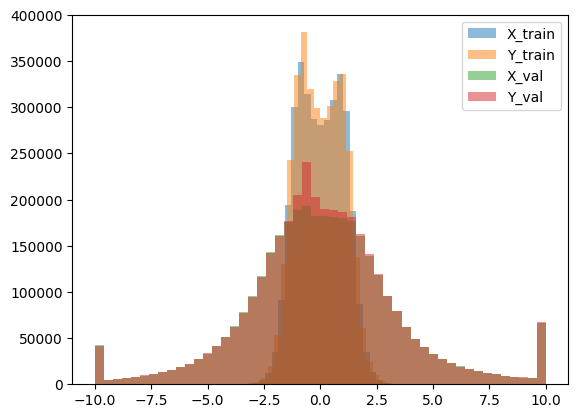

In [25]:
# Visualize data distribution
plt.hist(X_train.flatten(), bins=50, alpha=0.5, label='X_train')
plt.hist(Y_train.flatten(), bins=50, alpha=0.5, label='Y_train')
plt.hist(X_val.flatten(), bins=50, alpha=0.5, label='X_val')
plt.hist(Y_val.flatten(), bins=50, alpha=0.5, label='Y_val')
plt.legend()
plt.show()

##Define SimipleRNN model

In [26]:
# Load libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, TimeDistributed, Dense
from keras.optimizers import Adam

In [27]:
# Model definition
model = Sequential()

# RNN layers
model.add(SimpleRNN(128, input_shape=(72, 47616), return_sequences=True, activation='relu'))
model.add(SimpleRNN(128, return_sequences=True, activation='relu'))

# Dense output layer
model.add(TimeDistributed(Dense(49152, activation='linear')))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

##Train SimpleRNN model

In [28]:
# Train model
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50)

Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 1.0038 - val_loss: 21.9681
Epoch 2/50
1/1 [==============================] - 1s 524ms/step - loss: 5.2306 - val_loss: 14.2123
Epoch 3/50
1/1 [==============================] - 1s 512ms/step - loss: 1.9355 - val_loss: 13.3430
Epoch 4/50
1/1 [==============================] - 1s 522ms/step - loss: 1.8066 - val_loss: 12.9913
Epoch 5/50
1/1 [==============================] - 0s 455ms/step - loss: 1.6377 - val_loss: 12.1952
Epoch 6/50
1/1 [==============================] - 0s 433ms/step - loss: 1.2147 - val_loss: 11.9007
Epoch 7/50
1/1 [==============================] - 0s 453ms/step - loss: 0.9665 - val_loss: 11.1052
Epoch 8/50
1/1 [==============================] - 0s 428ms/step - loss: 0.8027 - val_loss: 10.6613
Epoch 9/50
1/1 [==============================] - 0s 445ms/step - loss: 0.6317 - val_loss: 10.4678
Epoch 10/50
1/1 [==============================] - 0s 471ms/step - loss: 0.5464 - val_loss: 10.4610
Epoch 11/50


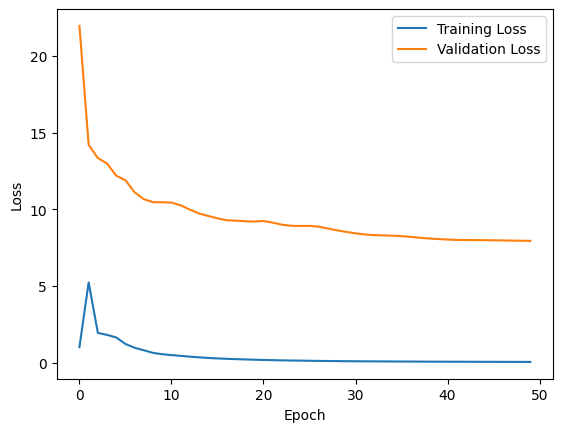

In [29]:
# Visualize training & validation error trends
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

##Model evaluation: MAE & RMSE

Slicing as input variables

In [30]:
# Prediction for input
var_lengths = {
    'state_t': 23040,
    'state_q0001': 23040,
    'state_ps': 384,
    'pbuf_SOLIN': 384,
    'pbuf_LHFLX': 384,
    'pbuf_SHFLX': 384
}

val_predictions_reshaped = model.predict(X_val).reshape(72, -1)
Y_val_reshaped = Y_val.reshape(72, -1)

1/1 [==============================] - 0s 318ms/step


In [31]:
# Calculate MAE and RMSE per input variable
from sklearn.metrics import mean_squared_error, mean_absolute_error

def calc_MAE(pred, target):
    return np.abs(pred - target).mean()

def calc_RMSE(pred, target):
    return np.sqrt(((pred - target) ** 2).mean())

start = 0
variables = ['state_t', 'state_q0001', 'state_ps', 'pbuf_SOLIN', 'pbuf_LHFLX', 'pbuf_SHFLX']
MAE_values = []
RMSE_values = []

for var, length in var_lengths.items():
    end = start + length
    pred_slice = val_predictions_reshaped[:, start:end]
    true_slice = Y_val_reshaped[:, start:end]

    # Check the shapes
    assert pred_slice.shape == true_slice.shape, f"Mismatched shapes for {var}: {pred_slice.shape} vs {true_slice.shape}"

    mae = calc_MAE(pred_slice, true_slice)
    rmse = calc_RMSE(pred_slice, true_slice)

    MAE_values.append(mae)
    RMSE_values.append(rmse)

    print(f"{var} - MAE: {mae}, RMSE: {rmse}")

    start = end

state_t - MAE: 1.9576143193537583, RMSE: 2.7183044906020286
state_q0001 - MAE: 2.047471624569511, RMSE: 2.958650093101575
state_ps - MAE: 1.6046039929291607, RMSE: 2.1691036970392124
pbuf_SOLIN - MAE: 1.6399831422154265, RMSE: 2.267339392588456
pbuf_LHFLX - MAE: 1.6332240924210297, RMSE: 2.4675784515032717
pbuf_SHFLX - MAE: 1.9496959729352383, RMSE: 3.050522527538315


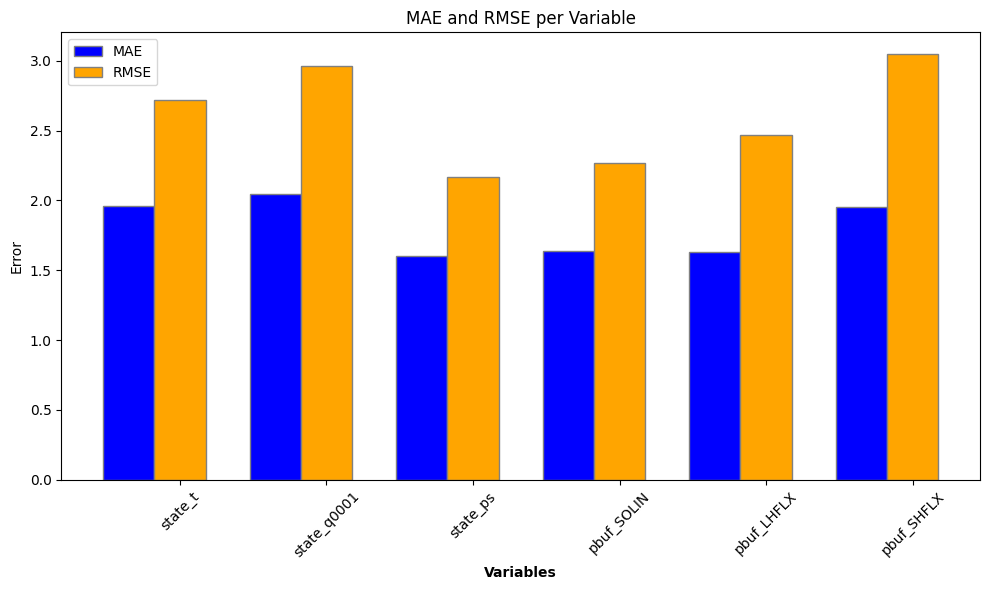

In [32]:
# Plot MAE and RMSE per input variable
barWidth = 0.35
r1 = np.arange(len(MAE_values))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(10,6))
plt.bar(r1, MAE_values, color='blue', width=barWidth, edgecolor='grey', label='MAE')
plt.bar(r2, RMSE_values, color='orange', width=barWidth, edgecolor='grey', label='RMSE')

plt.xlabel('Variables', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(MAE_values))], variables, rotation=45)
plt.ylabel('Error')
plt.legend()

plt.title('MAE and RMSE per input Variable')
plt.tight_layout()
plt.show()

Slicing as output variables

In [33]:
# Prediction for output
output_variables = ['state_t', 'state_q0001', 'cam_out_NETSW', 'cam_out_FLWDS', 'cam_out_PRECSC', 'cam_out_PRECC', 'cam_out_SOLS', 'cam_out_SOLL', 'cam_out_SOLSD', 'cam_out_SOLLD']

length1 = 23040
length2 = 384
output_var_lengths = {
    'state_t': length1,
    'state_q0001': length1,
    'cam_out_NETSW': length2,
    'cam_out_FLWDS': length2,
    'cam_out_PRECSC': length2,
    'cam_out_PRECC': length2,
    'cam_out_SOLS': length2,
    'cam_out_SOLL': length2,
    'cam_out_SOLSD': length2,
    'cam_out_SOLLD': length2
}

val_predictions_reshaped = model.predict(X_val).reshape(72, -1)
Y_val_reshaped = Y_val.reshape(72, -1)

1/1 [==============================] - 0s 75ms/step


In [34]:
# Calculate MAE and RMSE per output variable
start = 0
output_variables = ['state_t', 'state_q0001', 'cam_out_NETSW', 'cam_out_FLWDS', 'cam_out_PRECSC', 'cam_out_PRECC', 'cam_out_SOLS', 'cam_out_SOLL', 'cam_out_SOLSD', 'cam_out_SOLLD']
MAE_values = []
RMSE_values = []

for var, length in output_var_lengths.items():
    end = start + length
    pred_slice = val_predictions_reshaped[:, start:end]
    true_slice = Y_val_reshaped[:, start:end]

    assert pred_slice.shape == true_slice.shape, f"Mismatched shapes for {var}: {pred_slice.shape} vs {true_slice.shape}"

    mae = calc_MAE(pred_slice, true_slice)
    rmse = calc_RMSE(pred_slice, true_slice)

    MAE_values.append(mae)
    RMSE_values.append(rmse)

    print(f"{var} - MAE: {mae}, RMSE: {rmse}")

    start = end

state_t - MAE: 1.9576143193537583, RMSE: 2.7183044906020286
state_q0001 - MAE: 2.047471624569511, RMSE: 2.958650093101575
cam_out_NETSW - MAE: 1.6046039929291607, RMSE: 2.1691036970392124
cam_out_FLWDS - MAE: 1.6399831422154265, RMSE: 2.267339392588456
cam_out_PRECSC - MAE: 1.6332240924210297, RMSE: 2.4675784515032717
cam_out_PRECC - MAE: 1.9496959729352383, RMSE: 3.050522527538315
cam_out_SOLS - MAE: 1.725008807012634, RMSE: 2.6340257360829376
cam_out_SOLL - MAE: 1.7079108851814997, RMSE: 2.5930633800562974
cam_out_SOLSD - MAE: 1.5924899273690887, RMSE: 2.069006860901343
cam_out_SOLLD - MAE: 1.588415170611723, RMSE: 2.1913866202228807


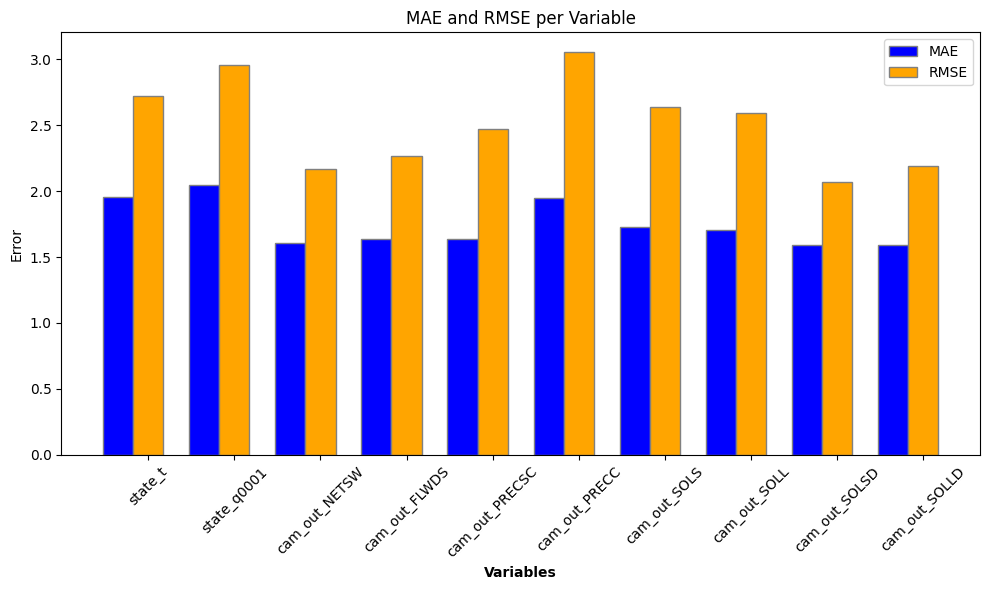

In [35]:
# Plot MAE and RMSE per output variable
barWidth = 0.35
r1 = np.arange(len(MAE_values))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(10,6))
plt.bar(r1, MAE_values, color='blue', width=barWidth, edgecolor='grey', label='MAE')
plt.bar(r2, RMSE_values, color='orange', width=barWidth, edgecolor='grey', label='RMSE')

plt.xlabel('Variables', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(MAE_values))], output_variables, rotation=45)
plt.ylabel('Error')
plt.legend()

plt.title('MAE and RMSE per output Variable')
plt.tight_layout()
plt.show()